In [52]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv('3.2_linear_interpolation.csv')

data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

data = data['Rent_of_Primary_residence']

In [54]:
def calculate_mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [55]:
def train_and_evaluate_model(model, train_data, test_data):
    model_fit = model.fit()

    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    mse = mean_squared_error(test_data, predictions)
    mape = calculate_mape(test_data, predictions)

    return mse, mape

In [56]:
# Split the data into train and test sets
train_data = data['1992':'2020']
test_data = data['2021']

# Train and evaluate the AR(3) model
ar3_model = ARIMA(train_data, order=(3, 0, 0))
mse, mape = train_and_evaluate_model(ar3_model, train_data, test_data)
print(f"AR(3) MSE: {mse}, MAPE: {mape}%")

# Train and evaluate the AR(5) model
ar5_model = ARIMA(train_data, order=(5, 0, 0))
mse, mape = train_and_evaluate_model(ar5_model, train_data, test_data)
print(f"AR(5) MSE: {mse}, MAPE: {mape}%")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

AR(3) MSE: 19.79203112503266, MAPE: 0.8691547172874877%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

AR(5) MSE: 3.4771565937797413, MAPE: 0.42550550808537296%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
def train_and_evaluate_model(model, train_data, test_data):
    # Fit the model
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    # Calculate MSE and MAPE
    mse = mean_squared_error(test_data, predictions)
    mape = calculate_mape(test_data, predictions)

    return mse, mape, predictions

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

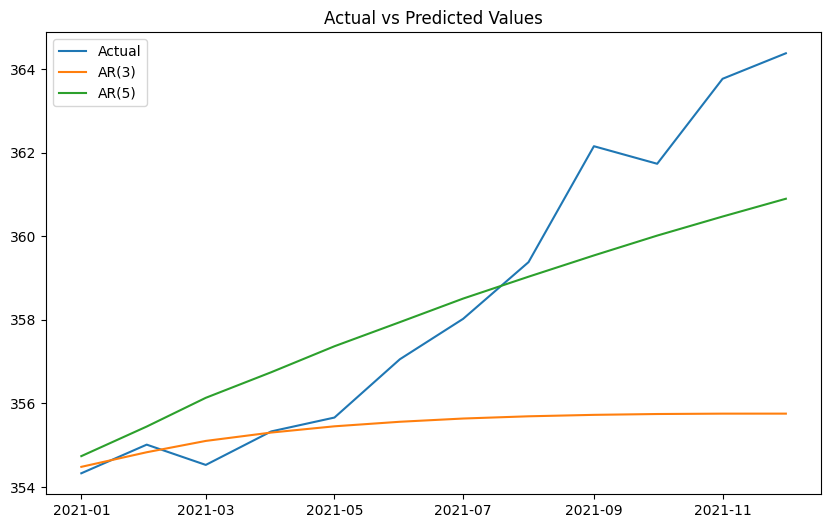

In [58]:
# Train and evaluate the AR(3) model
ar3_model = ARIMA(train_data, order=(3, 0, 0))
mse, mape, ar3_predictions = train_and_evaluate_model(ar3_model, train_data, test_data)

# Train and evaluate the AR(5) model
ar5_model = ARIMA(train_data, order=(5, 0, 0))
mse, mape, ar5_predictions = train_and_evaluate_model(ar5_model, train_data, test_data)

# Plot the actual and predicted values
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, ar3_predictions, label='AR(3)')
plt.plot(test_data.index, ar5_predictions, label='AR(5)')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()


EWMA Prediction

In [59]:
def ewma_predictions(data, alpha):
    return data.ewm(alpha=alpha).mean()


In [60]:
# Calculate EWMA predictions for alpha=0.5
ewma05_predictions = ewma_predictions(train_data, 0.5)
ewma05_predictions_test = ewma_predictions(test_data, 0.5)

# Calculate EWMA predictions for alpha=0.8
ewma08_predictions = ewma_predictions(train_data, 0.8)
ewma08_predictions_test = ewma_predictions(test_data, 0.8)


In [61]:
# Calculate MSE and MAPE for EWMA with alpha=0.5
mse_ewma05 = mean_squared_error(test_data, ewma05_predictions_test)
mape_ewma05 = calculate_mape(test_data, ewma05_predictions_test)

print(f"EWMA (α=0.5) MSE: {mse_ewma05}, MAPE: {mape_ewma05}%")

# Calculate MSE and MAPE for EWMA with alpha=0.8
mse_ewma08 = mean_squared_error(test_data, ewma08_predictions_test)
mape_ewma08 = calculate_mape(test_data, ewma08_predictions_test)

print(f"EWMA (α=0.8) MSE: {mse_ewma08}, MAPE: {mape_ewma08}%")


EWMA (α=0.5) MSE: 0.8629184395663066, MAPE: 0.206669629085216%
EWMA (α=0.8) MSE: 0.07524930485410496, MAPE: 0.05963864627812064%


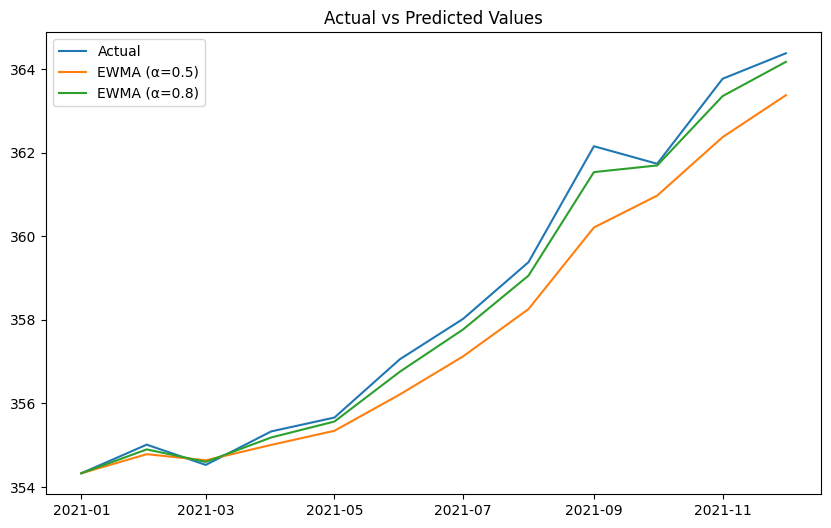

In [62]:
# Extend EWMA predictions to the test set
ewma05_predictions = pd.concat([ewma05_predictions, ewma05_predictions_test])
ewma08_predictions = pd.concat([ewma08_predictions, ewma08_predictions_test])

# Plot the actual and predicted values
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, ewma05_predictions[test_data.index], label='EWMA (α=0.5)')
plt.plot(test_data.index, ewma08_predictions[test_data.index], label='EWMA (α=0.8)')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()
